# Phân cụm dữ liệu bằng giải thuật K-means (unsupervised learning)

## Mục tiêu 
- Hiểu hoạt động của giải thuật K-means 
- Biết cách sử dụng K-means: thay đổi tham số, đánh giá chất lượng
- Ứng dụng 

## Dữ liệu 
- Sử dụng hàm sinh dữ liệu tự động của sklearn (sinh ra các điểm ngẫu nhiên theo phân phối Gauss)
- Mỗi dữ liệu là một điểm trên mặt phẳng Oxy
- Ảnh bird_small.png: hình ảnh về một chú chim, được sử dụng để minh họa tác dụng của K-means trong việc nén ảnh

## Yêu cầu
- Sử dụng K-means để phân loại các điểm dữ liệu. 
- Thử nghiệm các trường hợp có số cụm nhiều hơn hoặc ít hơn 

# Các thư viện sử dụng 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# Chuẩn bị dữ liệu 
- Sinh dữ liệu ngẫu nhiên n_samples = 100 tương đương 100 điểm 
    - random_state: biến cố định hàm random - để các điểm sinh ngẫu nhiên 
    
- Mỗi điểm dữ liệu có 2 chiều 

In [2]:
n_samples = 100
random_state = 170
center_points = [[1, 1], [-1, -1], [1, -1]] # sinh ngẫu nhiên các điểm xung quanh vị trí tâm cố định 
# center_points = 3                           # tâm cụm được chọn ngẫu nhiên

X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=center_points, cluster_std=0.6)
print("Số chiều dữ liệu: ", X.shape, y.shape)
print("5 điểm dữ liệu đầu tiên: \n", X[:5])

Số chiều dữ liệu:  (100, 2) (100,)
5 điểm dữ liệu đầu tiên: 
 [[ 1.26241305  0.94872541]
 [-0.39743873 -1.18567406]
 [ 1.35081331  0.48041993]
 [ 1.21219555  0.98929291]
 [-0.75344338 -1.09784774]]


**Vẽ các điểm ảnh sử dụng matlib plot**

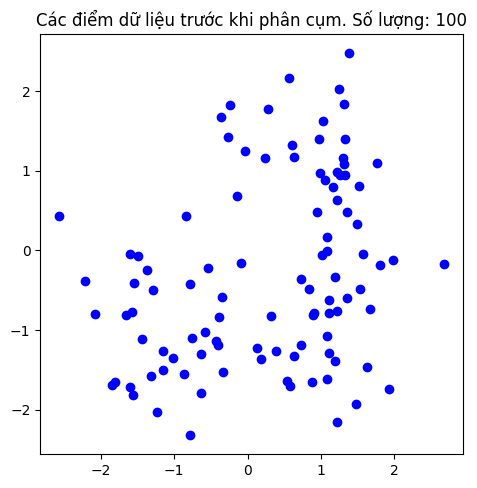

In [3]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c='blue') # c là tham số chọn màu sắc, có thể truyền vào string hoặc số id 1,2,3 ...
plt.title("Các điểm dữ liệu trước khi phân cụm. Số lượng: {}".format(n_samples))
plt.show()

#  Dựng giải thuật K-means và huấn luyện
- Sử dụng thư viện sklearn để xây dựng giải thuật K-means, xem chi tiết tại [tài liệu hướng dẫn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [4]:
k_cluster = 3
k_mean_model = KMeans(n_clusters=k_cluster, random_state=random_state)
k_mean_model.fit(X)

centers = np.array(k_mean_model.cluster_centers_) # cluster_centers_: là thuộc tính lưu trữ các 
                                                  # tâm cụm sau khi training 
print("Tâm cụm sau khi training ({} tâm): \n".format(k_cluster),
      centers)


Tâm cụm sau khi training (3 tâm): 
 [[ 1.11177838 -0.94555162]
 [ 0.88823619  1.19442485]
 [-1.13949326 -0.97100768]]


# Kiểm tra giải thuật K-means 

- Kiểm tra các điểm dữ liệu thuộc vào cụm nào 
- Vẽ biểu đồ hiển thị, trong đó các điểm thuộc các cụm khác nhau sẽ có các màu khác nhau 

Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: 

[1 2 1 1 2]


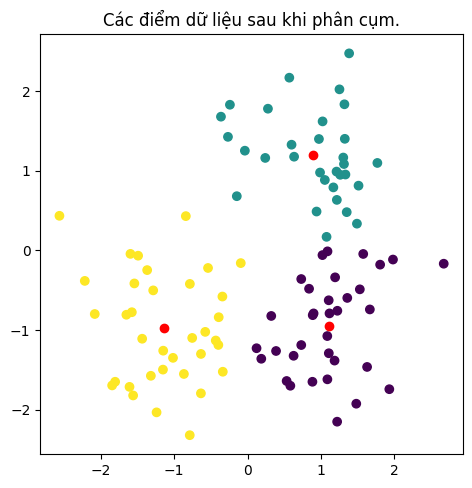

In [9]:
y_pred = k_mean_model.predict(X)
print("Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: \n")
print(y_pred[:5])

plt.figure(figsize=(12, 12))
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title("Các điểm dữ liệu sau khi phân cụm.")
plt.show()

# Bài tập 1
Yêu cầu: Thử nghiệm trường hợp dữ liệu sinh ra chỉ có 2 cụm nhưng huấn luyện K-means với các tham số k = 3,4,5 cụm

- Tự viết code sinh dữ liệu tương tự bên trên
- Xây dựng mô hình 3,4,5 cụm

Gợi ý: thay đổi tham số số cụm khi dựng giải thuật K-means

Kết quả phải ra được hình ảnh thể hiện đúng số tâm cụm và phân bố cụm. 

In [12]:
n_samples = 100
random_state = 170
center_points = 2                           # tâm cụm được chọn ngẫu nhiên

X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=center_points, cluster_std=0.6)
print("Số chiều dữ liệu: ", X.shape, y.shape)
print("5 điểm dữ liệu đầu tiên: \n", X[:5])

Số chiều dữ liệu:  (100, 2) (100,)
5 điểm dữ liệu đầu tiên: 
 [[-8.87090181 -6.2923396 ]
 [-5.68131011  0.92989934]
 [-4.48237839 -0.2011274 ]
 [-9.70586418 -5.3021706 ]
 [-8.77808596 -5.67185751]]


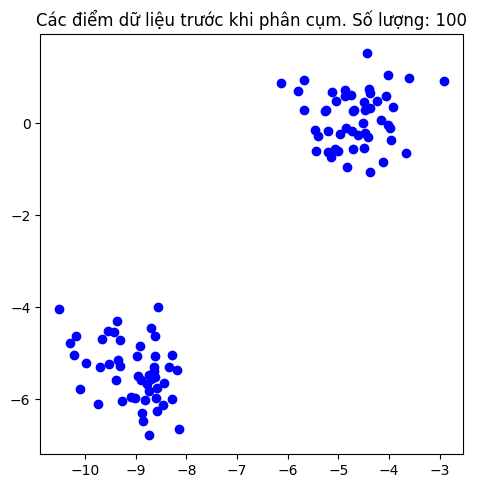

In [13]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c='blue') # c là tham số chọn màu sắc, có thể truyền vào string hoặc số id 1,2,3 ...
plt.title("Các điểm dữ liệu trước khi phân cụm. Số lượng: {}".format(n_samples))
plt.show()

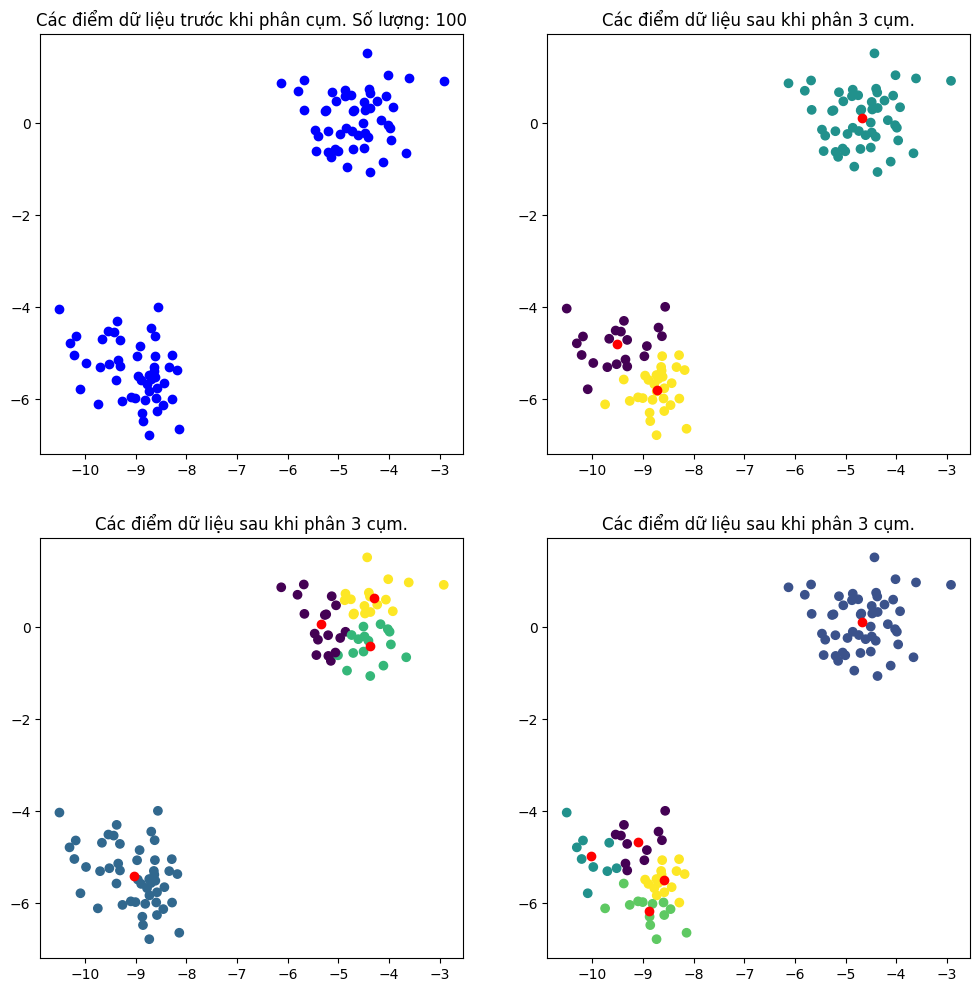

In [14]:
clusters = [3, 4, 5]
#fig, axs = plt.subplots(1, 3, figsize=(20, 5))
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c='blue') # c là tham số chọn màu sắc, có thể truyền vào string hoặc số id 1,2,3 ...
plt.title("Các điểm dữ liệu trước khi phân cụm. Số lượng: {}".format(n_samples))

for cluster in clusters:
    model = KMeans(n_clusters=cluster)
    model.fit(X)
    y_pred = model.predict(X)
    centers = np.array(model.cluster_centers_)
    plt.subplot(219+cluster)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(centers[:, 0], centers[:, 1], c='red')
    plt.title("Các điểm dữ liệu sau khi phân 3 cụm.")

plt.show()

# Ứng dụng nén ảnh 

- Đặt vấn đề:
    - Muốn xây dựng 1 hệ thống nén dữ liệu hình ảnh 
    - Có thể tuỳ chỉnh được độ sắc nét, giảm kích thước bộ nhớ, nhưng không làm sai lệch quá nhiều dưới mắt nhìn.  
- Giải pháp
    - Sử dụng giải thuật K-means, tự động phân cụm các điểm ảnh, giới hạn số lượng màu để giảm kích thước ảnh 
    - Mỗi điểm ảnh sẽ được quy về 1 cụm nào đó, mang giá trị màu bằng màu của tâm cụm. 


## Thư viện sử dụng - hỗ trợ hình ảnh 

In [17]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from IPython.core.display import Image, display

C:\Users\Admin\AppData\Local\Temp\ipykernel_5064\2555458203.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import Image, display


## Đọc dữ liệu hình ảnh
- Mỗi điểm ảnh là 1 mẫu quan sát 
- Phân cụm tập dữ liệu (tập các điểm ảnh) về k nhãn

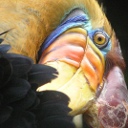

Dữ liệu ảnh trước khi reshape: (128, 128, 3)
Số chiều của dữ liệu hình ảnh:  (16384, 3)
Tổng số điểm ảnh là:  16384
Mỗi điểm ảnh có số chiều =  3


In [18]:
path_img = 'bird_small.png'

display(Image(path_img, width=250, unconfined=True))

img = io.imread(path_img)
print("Dữ liệu ảnh trước khi reshape:", img.shape)

img_shape = img.shape # 128x128x3
data_img = (img / 255.0).reshape(-1,img.shape[2]) # chuyển ma trận 128x128x3 về mảng 2 chiều, giữ lại chiều .shape[2]                    

print("Số chiều của dữ liệu hình ảnh: ", data_img.shape)
print("Tổng số điểm ảnh là: ", data_img.shape[0])
print("Mỗi điểm ảnh có số chiều = ", data_img.shape[1])

## Xây dựng mô hình kmean để nén ảnh 
- Số lượng cụm chính là số lượng màu ta giữ lại 
- Số lượng cụm càng nhỏ thì kích thước ảnh cho ra càng nhỏ 

In [19]:
n_color = 10
k_mean_model = KMeans(n_clusters=n_color)

**Huấn luyện mô hình**  

In [20]:
k_mean_model.fit(data_img)

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [22]:
# Hiển thị một số thông tin đã học của mô hình 
print("Số chiều của tâm cụm: ", k_mean_model.cluster_centers_.shape)
print(k_mean_model.cluster_centers_)
print(k_mean_model.labels_[0:20])

Số chiều của tâm cụm:  (10, 3)
[[0.83299468 0.60168474 0.30266655]
 [0.2117765  0.20293056 0.19826573]
 [0.96971724 0.91296285 0.75916943]
 [0.71836971 0.71664499 0.77182637]
 [0.62987435 0.46391997 0.22944858]
 [0.41269772 0.32352795 0.25256943]
 [0.47297849 0.44856293 0.48375211]
 [0.67789989 0.59073357 0.4953878 ]
 [0.87859699 0.73777541 0.48625085]
 [0.09280318 0.10008728 0.09006411]]
[8 8 8 8 8 8 8 8 8 0 8 8 8 8 8 8 0 8 8 8]


## Sinh dữ liệu ảnh mới 

In [23]:
# k_mean_model.labels_: chứa nhãn của tất cả các điểm ảnh 
# k_mean_model.cluster_centers_: chứa các tâm cụm. 
#new_arr = arr1[index]
img128=k_mean_model.cluster_centers_[k_mean_model.labels_]

print(img128.shape)

# chuẩn hoá lại kích thước ảnh theo chiều dài, rộng ban đầu 
img128=np.reshape(img128, img_shape)
print(img128.shape)
image.imsave('img128.png', img128)

(16384, 3)
(128, 128, 3)


In [24]:
# hiển thị kích thước hình ảnh trước và sau khi nén 
import os
print('Size of compressed image: ' + str(os.path.getsize('img128.png')) + ' KB')
print('Size of original image: ' + str(os.path.getsize('bird_small.png')) + ' KB')

Size of compressed image: 6908 KB
Size of original image: 33031 KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_5064\1469922195.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import Image, display


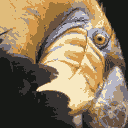

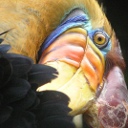

In [26]:
from IPython.core.display import Image, display

#Save image
display(Image('img128.png', width=250, unconfined=True))
display(Image(path_img, width=250, unconfined=True))

# Bài tập 2
Yêu cầu: Nén ảnh trên thành ảnh có số màu < 5 và kiểm tra 

Gợi ý: thay đổi tham số "số cụm" khi xây dựng K-means 

In [27]:
n = 3
model = KMeans(n_clusters=n)
model.fit(data_img)
print("Số chiều của tâm cụm: ", model.cluster_centers_.shape)
print(model.cluster_centers_)
print(model.labels_[0:20])

Số chiều của tâm cụm:  (3, 3)
[[0.890031   0.80509484 0.64793983]
 [0.1544698  0.14872829 0.13637901]
 [0.64132762 0.51246543 0.35845227]]
[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0]


In [28]:

img128_0=model.cluster_centers_[model.labels_]

print(img128_0.shape)

# chuẩn hoá lại kích thước ảnh theo chiều dài, rộng ban đầu 
img128_0=np.reshape(img128_0, img_shape)
print(img128_0.shape)
image.imsave('img128_0.png', img128_0)

(16384, 3)
(128, 128, 3)


In [29]:

print('Size of compressed image: ' + str(os.path.getsize('img128_0.png')) + ' KB')
print('Size of original image: ' + str(os.path.getsize('bird_small.png')) + ' KB')

Size of compressed image: 2790 KB
Size of original image: 33031 KB


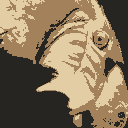

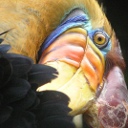

In [30]:
display(Image('img128_0.png', width=250, unconfined=True))
display(Image(path_img, width=250, unconfined=True))